In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib.animation as animation

# Parámetros
S_s = 1.0
K = 0.1
q = 0.0
Dx = 1.0  # Espaciado en x
Dy = 1.0  # Espaciado en y
Dt = 0.1  # Paso de tiempo
T = 100  # Tiempo total
Nx = 50  # Número de puntos en x
Ny = 50  # Número de puntos en y

# Condiciones iniciales
h = np.zeros((Nx, Ny))  # Inicializamos h en ceros

# Establecer condiciones iniciales específicas en las fronteras izquierda y derecha
h[:, 0] = 1.0  # Frontera izquierda
h[:, -1] = 0.0  # Frontera derecha

# Listas para almacenar los resultados en cada paso de tiempo
hist_h = [h.copy()]

In [2]:
for t in np.arange(0, T, Dt):
    new_h = h.copy()
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            laplacian_h = (
                (h[i + 1, j] - 2 * h[i, j] + h[i - 1, j]) / Dx ** 2 +
                (h[i, j + 1] - 2 * h[i, j] + h[i, j - 1]) / Dy ** 2
            )
            new_h[i, j] = h[i, j] + (Dt / S_s) * (K * laplacian_h + q)
            new_h[0,j] = new_h[1,j]
            new_h[-1,j] = new_h[-2,j]
    h = new_h
    hist_h.append(h.copy())
print(h)
nombre_archivo = "matriz2.txt"

# Guarda la matriz en el archivo de texto
np.savetxt(nombre_archivo, h)

[[1.00000000e+00 8.22778200e-01 6.54291074e-01 ... 5.67122450e-21
  1.05643264e-21 0.00000000e+00]
 [1.00000000e+00 8.22778200e-01 6.54291074e-01 ... 5.67122450e-21
  1.05643264e-21 0.00000000e+00]
 [1.00000000e+00 8.22778200e-01 6.54291074e-01 ... 5.67122450e-21
  1.05643264e-21 0.00000000e+00]
 ...
 [1.00000000e+00 8.22778200e-01 6.54291074e-01 ... 5.67122450e-21
  1.05643264e-21 0.00000000e+00]
 [1.00000000e+00 8.22778200e-01 6.54291074e-01 ... 5.67122450e-21
  1.05643264e-21 0.00000000e+00]
 [1.00000000e+00 8.22778200e-01 6.54291074e-01 ... 5.67122450e-21
  1.05643264e-21 0.00000000e+00]]


In [3]:
def plot_h(time_step):
    plt.figure(figsize=(8, 6))
    plt.imshow(hist_h[time_step], cmap='viridis', origin='lower', extent=[0, Nx, 0, Ny])
    plt.colorbar()
    plt.title(f'Tiempo: {time_step * Dt:.2f} segundos')
    plt.show()

interact(plot_h, time_step=(0, len(hist_h) - 1, 1))

interactive(children=(IntSlider(value=500, description='time_step', max=1000), Output()), _dom_classes=('widge…

<function __main__.plot_h(time_step)>

In [4]:
# Inicializar un arreglo para el campo de velocidades V
V = np.zeros((Nx, Ny, 2))  # 2 para representar componentes x y y

# Calcular el campo de velocidades V utilizando diferencias finitas centradas
for i in range(1, Nx - 1):
    for j in range(1, Ny - 1):
        d_h_dx = (h[i + 1, j] - h[i - 1, j]) / (2 * Dx)
        d_h_dy = (h[i, j + 1] - h[i, j - 1]) / (2 * Dy)
        V[i, j, 0] = -K * d_h_dx  # Componente en dirección x
        V[i, j, 1] = -K * d_h_dy  # Componente en dirección y

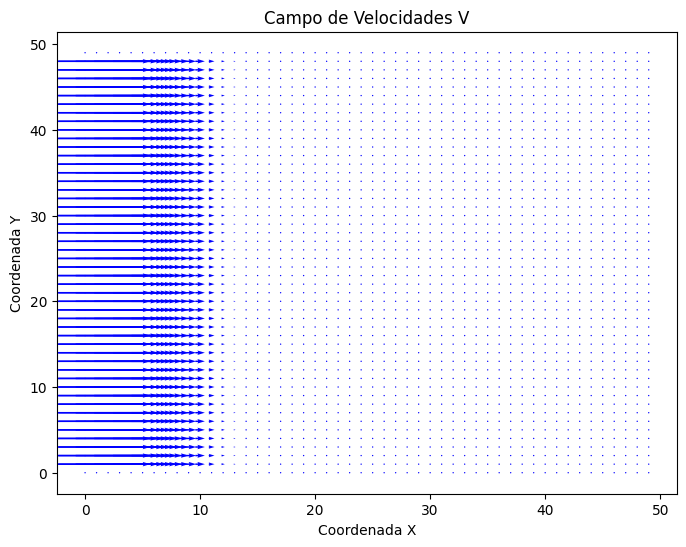

In [5]:
# Definir las coordenadas x e y en el dominio
x = np.linspace(0, Nx - 1, Nx)
y = np.linspace(0, Ny - 1, Ny)
X, Y = np.meshgrid(x, y)

# Graficar el campo de velocidades utilizando flechas
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, V[:, :, 1], V[:, :, 0], scale=0.1, color='b', pivot='mid')
plt.title('Campo de Velocidades V')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

In [6]:
D = 1
c0 = 1
phi = 1
# Condiciones iniciales
c = np.zeros((Nx, Ny))  # Inicializamos h en ceros

# Establecer condiciones iniciales específicas en las fronteras izquierda y derecha
c[20:30, 0] = 1.0  # Frontera izquierda
c[:, -1] = 0  # Frontera derecha

# Listas para almacenar los resultados en cada paso de tiempo
hist_c = [c.copy()]

In [7]:
for t in np.arange(0, T, Dt):
    new_c = c.copy()
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            V_dx = -K *(h[i + 1, j] - h[i - 1, j]) / (2 * Dx)
            V_dy = -K *(h[i, j + 1] - h[i, j - 1]) / (2 * Dy)
            
            c_dx = (c[i + 1, j] - c[i - 1, j]) / (2 * Dx)
            c_dy = (c[i, j + 1] - c[i, j - 1]) / (2 * Dy)

            V_c = V_dx*c_dx + V_dy*c_dy

            c1 = D * ((c[i-1,j]-2*c[i,j]+c[i+1,j]) / Dx**2 + (c[i,j-1]-2*c[i,j]+c[i,j+1]) /Dy**2)
            c2 = q * (c[i,j]-c0) 
            c3 = c.copy()
            
            new_c[i,j] = (Dt / phi)*(c1 - V_c + c2) + c3[i,j]
    c = new_c
    hist_c.append(c.copy())
    

In [8]:
def plot_c(time_step):
    plt.figure(figsize=(8, 6))
    plt.imshow(hist_c[time_step], cmap='viridis', origin='lower', extent=[0, Nx, 0, Ny])
    plt.colorbar()
    plt.title(f'Tiempo: {time_step * Dt:.2f} segundos')
    plt.show()

interact(plot_c, time_step=(0, len(hist_c) - 1, 1))

interactive(children=(IntSlider(value=500, description='time_step', max=1000), Output()), _dom_classes=('widge…

<function __main__.plot_c(time_step)>